In [1]:
import pandas as pd
import numpy as np

file_path = "Dataset.xlsx"
df = pd.read_excel(file_path)
print(df.shape)
df.head()

(13611, 17)


,Area,Perimeter,MajorAxisLength,DFactor1,DFactor2,DFactor3,DFactor4,DFactor5,DFactor6,DFactor7,DFactor8,DFactor9,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SE
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SE
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SE
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SE
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SE


In [2]:
df.drop_duplicates(inplace = True)
print("After droping duplicates the shape of DataFrame is "+ str(df.shape))
print(df.isnull().sum())
mask = df.isnull()
null_value_rows = df[mask.any(axis=1)]
null_value_rows

After droping duplicates the shape of DataFrame is (13543, 17)
Area               0
Perimeter          0
MajorAxisLength    0
DFactor1           0
DFactor2           0
DFactor3           0
DFactor4           0
DFactor5           0
DFactor6           0
DFactor7           0
DFactor8           0
DFactor9           0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


,Area,Perimeter,MajorAxisLength,DFactor1,DFactor2,DFactor3,DFactor4,DFactor5,DFactor6,DFactor7,DFactor8,DFactor9,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class


In [3]:
df.dropna(inplace=True)
print("After droping null values the shape of DataFrame is "+ str(df.shape))

After droping null values the shape of DataFrame is (13543, 17)


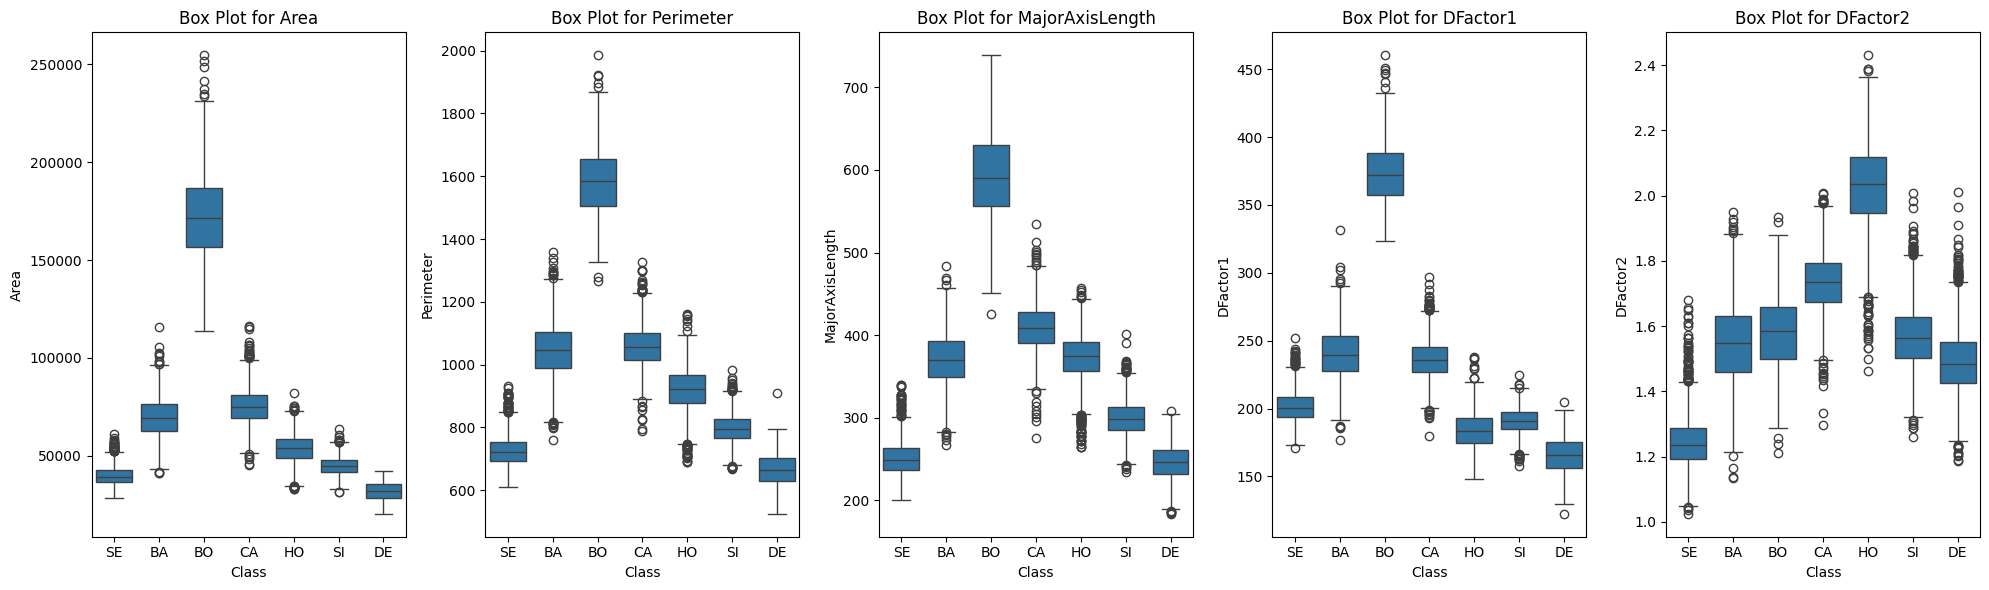

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to print multiple box plots
def multipleBoxPlots(df, columns):
    num_columns = len(columns)
    fig, axes = plt.subplots(1, num_columns, figsize=(20, 6))
    for i, column in enumerate(columns):
        sns.boxplot(x= 'Class', y=column, data=df, ax=axes[i])
        axes[i].set_xlabel('Class')
        axes[i].set_ylabel(column)
        axes[i].set_title('Box Plot for ' + column)
    plt.tight_layout()
    plt.show()

columns_to_plot = ['Area','Perimeter','MajorAxisLength','DFactor1','DFactor2']  # List of columns you want to plot
multipleBoxPlots(df, columns_to_plot)

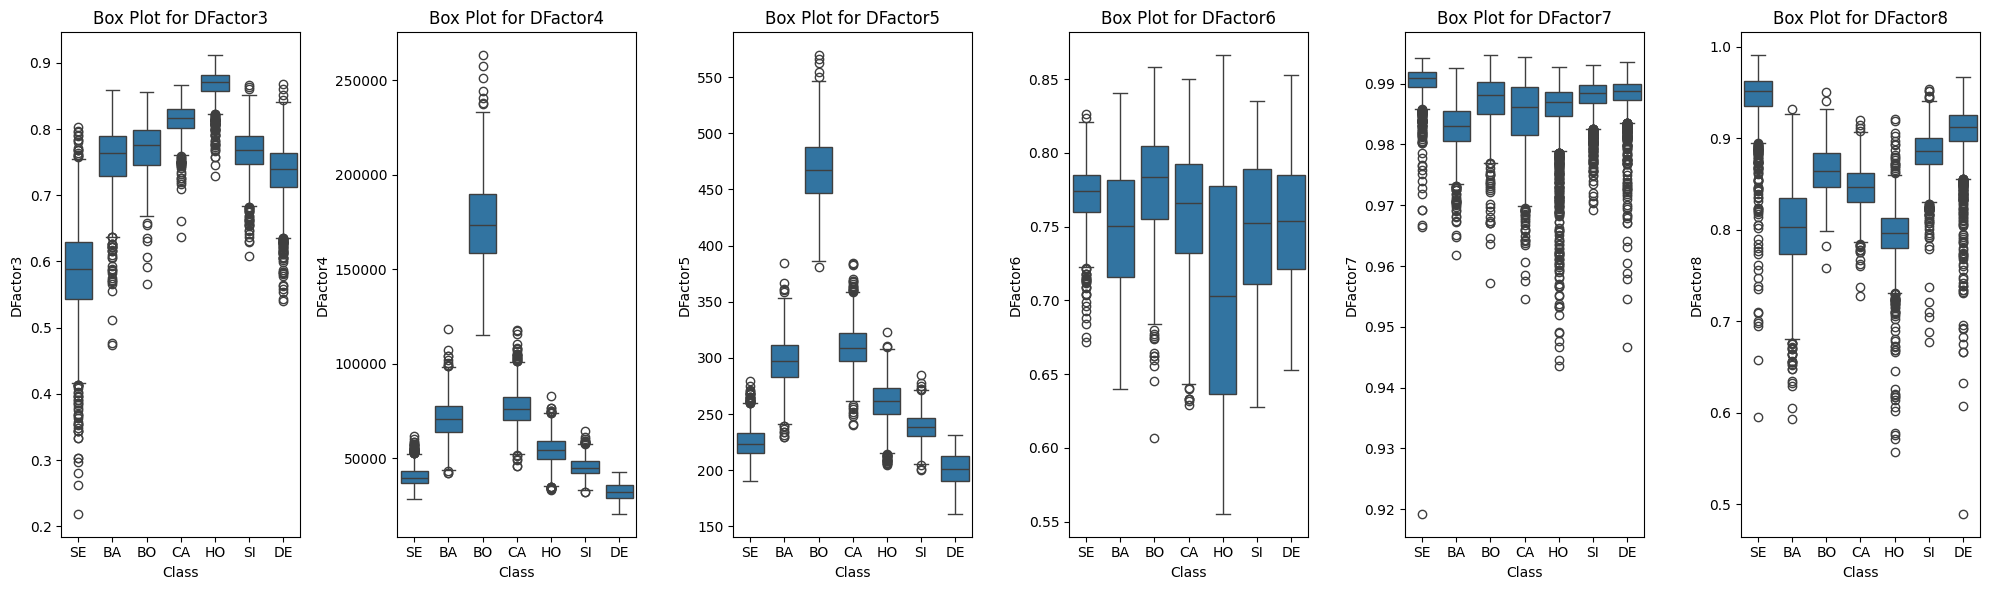

In [5]:
multipleBoxPlots(df, ['DFactor3','DFactor4','DFactor5','DFactor6','DFactor7','DFactor8'])

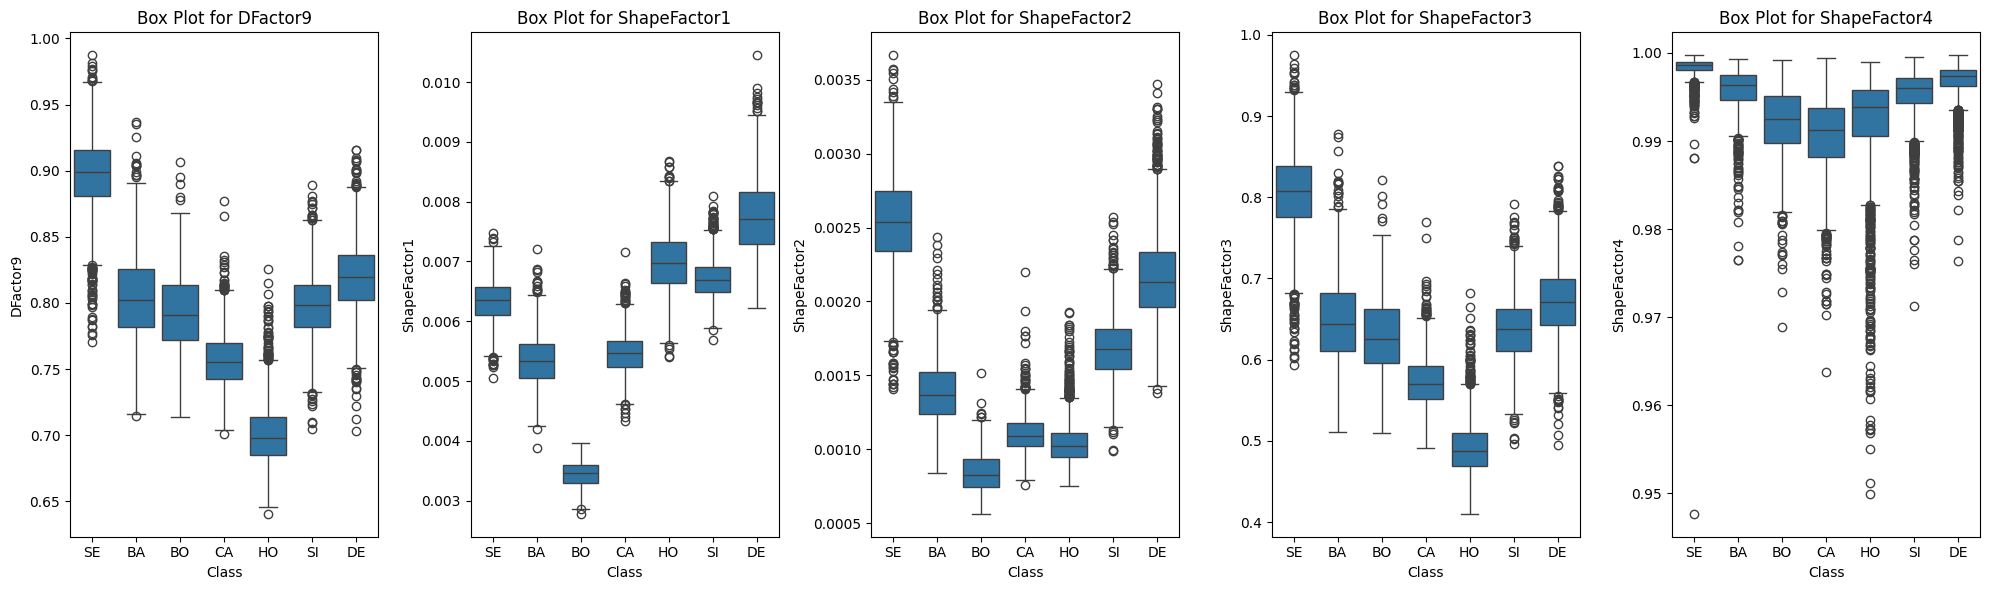

In [6]:
multipleBoxPlots(df, ['DFactor9','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4'])

In [7]:
df_heatMap = df.drop(columns=['Class'])
correlation_matrix = df_heatMap.corr()
correlation_matrix

,Area,Perimeter,MajorAxisLength,DFactor1,DFactor2,DFactor3,DFactor4,DFactor5,DFactor6,DFactor7,DFactor8,DFactor9,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966908,0.932623,0.952041,0.243698,0.268580,0.999940,0.984998,0.054648,-0.197333,-0.359068,-0.269797,-0.848390,-0.641208,-0.273754,-0.358019
Perimeter,0.966908,1.000000,0.977561,0.914336,0.386097,0.391062,0.967871,0.991453,-0.020620,-0.304662,-0.548336,-0.407426,-0.865756,-0.768590,-0.408888,-0.431215
MajorAxisLength,0.932623,0.977561,1.000000,0.828360,0.550075,0.541011,0.933392,0.962271,-0.077287,-0.284857,-0.595710,-0.567902,-0.775840,-0.859401,-0.567607,-0.484464
DFactor1,0.952041,0.914336,0.828360,1.000000,-0.005354,0.022391,0.951780,0.949214,0.145906,-0.156819,-0.214090,-0.018618,-0.947194,-0.475326,-0.022744,-0.266402
DFactor2,0.243698,0.386097,0.550075,-0.005354,1.000000,0.924185,0.245267,0.305237,-0.371234,-0.269110,-0.764975,-0.987644,0.020875,-0.837338,-0.978528,-0.451598
DFactor3,0.268580,0.391062,0.541011,0.022391,0.924185,1.000000,0.270350,0.319360,-0.319678,-0.298282,-0.720138,-0.970308,0.017266,-0.859246,-0.981058,-0.450611
DFactor4,0.999940,0.967871,0.933392,0.951780,0.245267,0.270350,1.000000,0.985255,0.052864,-0.206901,-0.363620,-0.271651,-0.848382,-0.642773,-0.275631,-0.364302
DFactor5,0.984998,0.991453,0.962271,0.949214,0.305237,0.319360,0.985255,1.000000,0.028762,-0.232344,-0.437189,-0.328980,-0.893403,-0.714693,-0.331594,-0.394693
DFactor6,0.054648,-0.020620,-0.077287,0.145906,-0.371234,-0.319678,0.052864,0.028762,1.000000,0.192268,0.344510,0.354912,-0.141525,0.237584,0.348226,0.148622
DFactor7,-0.197333,-0.304662,-0.284857,-0.156819,-0.269110,-0.298282,-0.206901,-0.232344,0.192268,1.000000,0.609668,0.304802,0.154346,0.344337,0.308614,0.700150


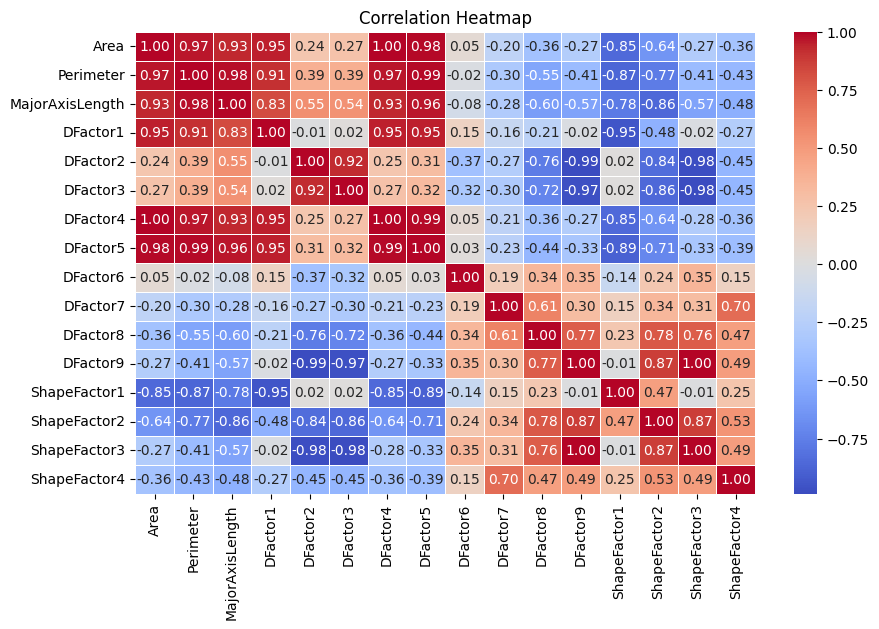

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [9]:
# Fuction for random data generation
def generate_random_data():
    feature_names = ['Area', 'Perimeter', 'MajorAxisLength', 'DFactor1', 'DFactor2', 'DFactor3',
                     'DFactor4', 'DFactor5', 'DFactor6', 'DFactor7', 'DFactor8', 'DFactor9',
                     'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

    feature_ranges = {
        'Area': (20000, 40000),
        'Perimeter': (500, 1000),
        'MajorAxisLength': (150, 250),
        'DFactor1': (1, 2),
        'DFactor2': (0.3, 1.2),
        'DFactor3': (0.2, 0.8),
        'DFactor4': (20000, 40000),
        'DFactor5': (150, 250),
        'DFactor6': (0.7, 1.2),
        'DFactor7': (0.8, 1.2),
        'DFactor8': (0.7, 1.0),
        'DFactor9': (0.9, 1.2),
        'ShapeFactor1': (0.005, 0.01),
        'ShapeFactor2': (0.002, 0.005),
        'ShapeFactor3': (0.7, 1.0),
        'ShapeFactor4': (0.99, 1.0)
    }

    random_data = []
    for feature, (low, high) in feature_ranges.items():
        random_value = np.random.uniform(low, high)
        rounded_value = round(random_value, 3)
        random_data.append(rounded_value)
    random_data_input = [random_data]
    print("The data used for prediction is: \n" + str(random_data_input) +"\n")
    return random_data_input

# Logistic Regression

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
fit = model.fit(X_train, y_train)

y_train_pred = fit.predict(X_train)
y_test_pred = fit.predict(X_test)

# accuracy = correctly classified / total classified
acc_train = sum(y_train_pred==y_train)/len(y_train)
acc_test = sum(y_test_pred==y_test)/len(y_test)
print(f"For Logistic regression:- train accuracy: {acc_train:.3f}; test accuracy: {acc_test:.3f}")

# Display confusion matrix
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test, y_test_pred))
print("\n")

# Display classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_test_pred))

# Predicting a new sample
predicted_class = fit.predict(generate_random_data())
print("Predicted class for the new sample using Logistic Regression:", predicted_class)

For Logistic regression:- train accuracy: 0.928; test accuracy: 0.921
Confusion Matrix for Logistic Regression:
[[357   0  16   0   1   2  11]
 [  0 153   0   0   0   0   0]
 [ 15   0 464   0   7   1   3]
 [  2   0   0 979   2  16  74]
 [  3   0   9   3 508   0  10]
 [  4   0   0  12   0 583  22]
 [  3   0   3  67  18  16 699]]


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          BA       0.93      0.92      0.93       387
          BO       1.00      1.00      1.00       153
          CA       0.94      0.95      0.95       490
          DE       0.92      0.91      0.92      1073
          HO       0.95      0.95      0.95       533
          SE       0.94      0.94      0.94       621
          SI       0.85      0.87      0.86       806

    accuracy                           0.92      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063

The data used for predic

# Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = DecisionTreeClassifier(random_state=1)
fit = model.fit(X_train, y_train)

y_train_pred = fit.predict(X_train)
y_test_pred = fit.predict(X_test)

# accuracy = correctly classified / total classified
acc_train = sum(y_train_pred==y_train)/len(y_train)
acc_test = sum(y_test_pred==y_test)/len(y_test)
print(f"For Decision Tree Classifier:- train accuracy: {acc_train:.3f}; test accuracy: {acc_test:.3f}")

# Display confusion matrix
print("Confusion Matrix for Decision Tree Classifier:")
print(confusion_matrix(y_test, y_test_pred))
print("\n")

# Display classification report
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, y_test_pred))

# Predicting a new sample
predicted_class = fit.predict(generate_random_data())
print("Predicted class for the new sample using Decision Tree Classifier:", predicted_class)

For Decision Tree Classifier:- train accuracy: 1.000; test accuracy: 0.894
Confusion Matrix for Decision Tree Classifier:
[[352   0  20   1   1   3  10]
 [  0 153   0   0   0   0   0]
 [ 32   0 433   0  13   3   9]
 [  1   0   0 961   7  13  91]
 [  5   0  14   1 494   0  19]
 [  4   0   3  21   0 573  20]
 [  8   0   6  86  23  18 665]]


Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

          BA       0.88      0.91      0.89       387
          BO       1.00      1.00      1.00       153
          CA       0.91      0.88      0.90       490
          DE       0.90      0.90      0.90      1073
          HO       0.92      0.93      0.92       533
          SE       0.94      0.92      0.93       621
          SI       0.82      0.83      0.82       806

    accuracy                           0.89      4063
   macro avg       0.91      0.91      0.91      4063
weighted avg       0.89      0.89      0.89      4063

The data 

# KNN Classifier

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5)
fit = model.fit(X_train, y_train)

y_train_pred = fit.predict(X_train)
y_test_pred = fit.predict(X_test)

# accuracy = correctly classified / total classified
acc_train = sum(y_train_pred==y_train)/len(y_train)
acc_test = sum(y_test_pred==y_test)/len(y_test)
print(f"For KNN Classifier:- train accuracy: {acc_train:.3f}; test accuracy: {acc_test:.3f}")

# Display confusion matrix
print("Confusion Matrix for KNN Classifier:")
print(confusion_matrix(y_test, y_test_pred))
print("\n")

# Display classification report
print("Classification Report for KNN Classifier:")
print(classification_report(y_test, y_test_pred))

# Predicting a new sample
predicted_class = fit.predict(generate_random_data())
print("Predicted class for the new sample using KNN Classifier:", predicted_class)

For KNN Classifier:- train accuracy: 0.945; test accuracy: 0.921
Confusion Matrix for KNN Classifier:
[[350   0  21   0   1   2  13]
 [  0 153   0   0   0   0   0]
 [ 12   0 468   0   7   1   2]
 [  0   0   0 986   2  15  70]
 [  0   0   7   3 513   0  10]
 [  3   0   0  20   0 577  21]
 [  2   0   3  81  17   8 695]]


Classification Report for KNN Classifier:
              precision    recall  f1-score   support

          BA       0.95      0.90      0.93       387
          BO       1.00      1.00      1.00       153
          CA       0.94      0.96      0.95       490
          DE       0.90      0.92      0.91      1073
          HO       0.95      0.96      0.96       533
          SE       0.96      0.93      0.94       621
          SI       0.86      0.86      0.86       806

    accuracy                           0.92      4063
   macro avg       0.94      0.93      0.94      4063
weighted avg       0.92      0.92      0.92      4063

The data used for prediction is: 
[[389

# Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, shuffle=True)

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=40, random_state=1)
fit = model.fit(X_train, y_train)

y_train_pred = fit.predict(X_train)
y_test_pred = fit.predict(X_test)

# accuracy = correctly classified / total classified
acc_train = sum(y_train_pred==y_train)/len(y_train)
acc_test = sum(y_test_pred==y_test)/len(y_test)
print(f"For Random Forest Classifier:- train accuracy: {acc_train:.3f}; test accuracy: {acc_test:.3f}")

# Display confusion matrix
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_test_pred))
print("\n")

# Display classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_test_pred))

# Predicting a new sample
predicted_class = fit.predict(generate_random_data())
print("Predicted class for the new sample using Random Forest Classifier:", predicted_class)

For Random Forest Classifier:- train accuracy: 1.000; test accuracy: 0.919
Confusion Matrix for Random Forest Classifier:
[[355   0  20   0   1   2   9]
 [  0 153   0   0   0   0   0]
 [ 15   0 464   0  10   1   0]
 [  0   0   0 993   1  15  64]
 [  2   0  12   3 503   0  13]
 [  3   0   0  17   0 585  16]
 [  4   0   3  85  15  18 681]]


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

          BA       0.94      0.92      0.93       387
          BO       1.00      1.00      1.00       153
          CA       0.93      0.95      0.94       490
          DE       0.90      0.93      0.91      1073
          HO       0.95      0.94      0.95       533
          SE       0.94      0.94      0.94       621
          SI       0.87      0.84      0.86       806

    accuracy                           0.92      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063

The data 